**Thêm thư viện**

In [23]:
import pandas as pd
import statistics as sta
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

**Tên file csv**

In [24]:
"""
csv = "output1.csv"
data = pd.read_csv(csv)
"""
df1 = pd.read_csv("output.csv")
df2 = pd.read_csv("output1.csv")
data = df1.append(df2, sort=True)


# **Xử lý dữ liệu**

**Xử lý và chuyển giá sản phẩm thành dạng số thực**

In [25]:
price = data["p_price"]
new_price = []
for item in price:
    item = str(item)
    if "." in item:
        item = item.replace(".","") # Xóa dấu chấm trong giá tiền
    if item[-1]=="₫":   # Xóa kí tự ₫ trong giá tiền
        item = item.replace("₫","")
    item = item.strip()     # Loại bỏ khoảng trắng trước và sau giá tiền
    new_price.append(int(item))   # Chuyển giá tiền về kiểu dữ liệu số nguyên
data["p_price"] = new_price

**Hàm tạo bảng thống kê và vẽ Barplot**

Dành cho những cột dữ liệu thông thường và không cần chỉnh sửa gì thêm

In [26]:
def stat_table(a,title_plt=""):
    x = data.groupby(a)[a].count()
    dt = pd.DataFrame(x)
    dt.columns = ['quantity']
    count = []
    for i in dt['quantity']:
        x = i
        count.append(round(x))
    dt['quantity'] = count
    print(dt)
    mylabels = dt.index
    plt.figure(figsize = (10, 4))
    # Barplot
    plt.title(title_plt, fontsize = 20, color = 'red')
    sns.barplot(count, mylabels, data = dt, orient = 'h')

**Hàm vẽ khoảng giá tiền sản phẩm**

Lấy lại từ stat_table và được điều chỉnh lại

In [27]:
# Lọc và phân chia các khoảng giá tiền của sản phẩm
price_cate = data["p_price"]
# Phân loại và thống kê giá trị của các sản phẩm
list_cate = ["Sản phẩm có giá từ 0 - dưới 10k","Sản phẩm có giá từ 10k - dưới 100k","Sản phẩm có giá từ 100k - dưới 1tr","Sản phẩm có giá từ 1tr - 10tr","Sản phẩm có giá từ trên 10tr"]
count_list_cate = [0, 0, 0, 0, 0]
count_price_cate = []
for item in price_cate:
    if item<10000:
        count_list_cate[0] = count_list_cate[0] +1
    elif item<100000:
        count_list_cate[1] = count_list_cate[1] +1
    elif item<1000000:
        count_list_cate[2] = count_list_cate[2] +1
    elif item<10000000:
        count_list_cate[3] = count_list_cate[3] +1
    else:
        count_list_cate[4] = count_list_cate[4] +1
# Tính phần trăm
for item in count_list_cate:
    count_price_cate.append(round(item))
    
def barplot_khoang_gia_tien_san_pham(count, list_cate):
    price_df = pd.Series(count, index=list_cate) # Tạo dataframe với 2 cột là tên danh mục và phần trăm các khoảng tiền
    print(price_df)
    mylabels = price_df.index
    plt.figure(figsize = (10, 4))
    plt.title('Các khoảng giá tiền của các sản phẩm', fontsize = 20, color = 'red')
    sns.barplot(price_df, mylabels, orient = 'h')

**Hàm vẽ biểu đồ thống kê các thương hiệu sản phẩm**

Lấy lại từ stat_table và được điều chỉnh lại

In [28]:
def barplot_cac_thuong_hieu_san_pham(column,title=""):
    data_check = data[column]       # Lấy cột dữ liệu từ dataframe
    brand_list_check = []           # Danh sách chứa tên các thương hiệu chưa qua xử lý
    quantity_list_check = []        # Danh sách chứa số lượng của mỗi thương hiệu chưa qua xử lý

    for item in data_check:                                                 #####
        if item not in brand_list_check:                                        #
            brand_list_check.append(item)                                       #   
            quantity_list_check.append(1)                                       #
        else:                                                                   #
            index = brand_list_check.index(item)                                #
            quantity_list_check[index] = quantity_list_check[index]+1       #####

    quantity = []       # Danh sách chứa tên các thương hiệu đã qua xử lý
    brand = []          # Danh sách chứa số lượng của mỗi thương hiệu đã qua xử lý

    for item in range(len(quantity_list_check)):                                                                
        count = quantity_list_check[item]
        name_brand = brand_list_check[item]
        if count<15:                                    # Thương hiệu có ít hơn 15 sản phẩm     #####   Lọc và xử lý
            name_brand = "Các thương hiệu nhỏ"          #  được xem là thương hiệu nhỏ              #    các thương hiệu
        if name_brand == "No Brand":            # Các sản phẩm không có thương hiệu                 #   Tránh bị quá nhiều
            name_brand = "Không có thương hiệu"                                                 #####    thương hiệu lúc vẽ barplot

        if name_brand not in brand:                         #####
            brand.append(name_brand)                            #   
            quantity.append(count)                              #   Đếm số lượng sản phẩm
        else:                                                   #   của tất cả các thương hiệu
            index = brand.index(name_brand)                     #
            quantity[index] = quantity[index] + count       #####

    brand_df = pd.Series(quantity, index=brand) # Tạo dataframe với 2 cột là tên thương hiệu và số lượng sản phẩm
    brand_df = brand_df.sort_values()       # Sắp xếp lại dataframe theo thứ tự tăng dần dựa vào số lượng sản phẩm
    print(brand_df)
    mylabels = brand_df.index
    plt.figure(figsize = (10, 4))
    plt.title(title, fontsize = 20, color = 'red')
    sns.barplot(brand_df, mylabels, orient = 'h')

# **Kết quả thống kê**

**Tổng quan về file csv**

In [29]:
print(f"Dữ liệu thu thập được từ Lazada có {len(price_cate)} sản phẩm")
print(f"Mỗi sản phẩm có {len(data.columns)} cột chứa dữ liệu")
data.head(2)

Dữ liệu thu thập được từ Lazada có 2490 sản phẩm
Mỗi sản phẩm có 17 cột chứa dữ liệu


,p_brand,p_cate,p_image,p_mall,p_name,p_number_reviews,p_price,p_rate1star,p_rate2star,p_rate3star,p_rate4star,p_rate5star,p_rating,s_name,s_rating,s_response_rate,s_ship_ontime
0,Dell,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/ab973a529b50491bb63a...,Mall,Laptop Dell Inspiron 7400 14.5 inches IPS QHD ...,Không có đánh giá,31490000,0.0,0.0,0.0,0.0,0.0,0.0,DELL Official Retail Store,88%,100%,100%
1,HP,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/0fc9119358dc21cb9dcd...,Mall,Laptop HP ProBook 450 G8 2H0Y1PA (Core i7-1165...,Không có đánh giá,31490000,0.0,0.0,0.0,0.0,0.0,0.0,An Phát HP,94%,89%,100%


                              quantity
p_cate                                
Electronics Accessories            175
Giày dép & Quần áo nữ              120
Màn hình & Máy in                  240
Máy vi tính & Laptop               399
Máy ảnh & Máy bay camera           718
TV & Video                          40
Thiết bị thông minh                440
Túi xách và Vali túi du lịch        79
Âm thanh                           199
Điện thoại & Máy tính bảng          80


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


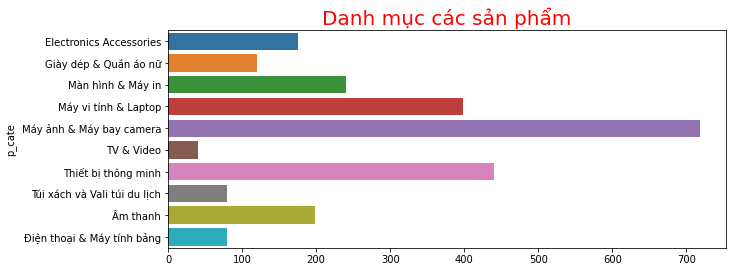

In [30]:
stat_table("p_cate", "Danh mục các sản phẩm")

Sản phẩm có giá từ 0 - dưới 10k        147
Sản phẩm có giá từ 10k - dưới 100k     658
Sản phẩm có giá từ 100k - dưới 1tr    1000
Sản phẩm có giá từ 1tr - 10tr          489
Sản phẩm có giá từ trên 10tr           196
dtype: int64


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


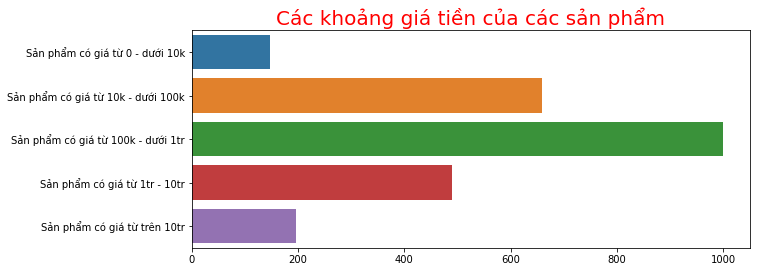

In [31]:
barplot_khoang_gia_tien_san_pham(count_price_cate, list_cate)

          quantity
p_mall            
Mall           262
Non-Mall      2228


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


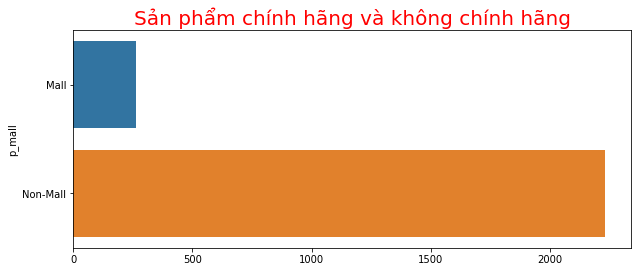

In [32]:
stat_table("p_mall","Sản phẩm chính hãng và không chính hãng")

Số lượng thương hiệu: 2490
MAC                       15
Epson                     16
TP-Link                   17
amazfit                   19
GoPro                     22
Microsoft                 22
IMOU                      32
Apple                     34
Xiaomi                    39
Samsung                   40
HP                        48
yoosee                    65
Ezviz                     81
Dell                     107
Các thương hiệu nhỏ      425
OEM                      426
Không có thương hiệu    1082
dtype: int64


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


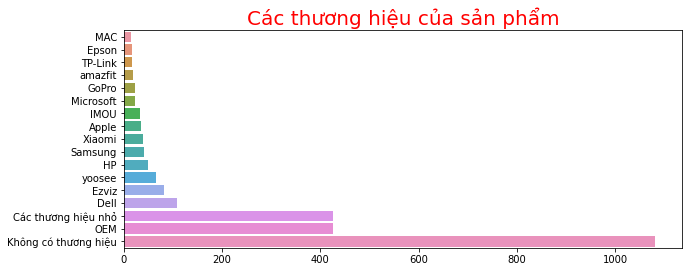

In [33]:
total_brand = data["p_brand"]
print(f"Số lượng thương hiệu: {len(total_brand)}")
barplot_cac_thuong_hieu_san_pham('p_brand',"Các thương hiệu của sản phẩm")